In [ ]:
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 133 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [98]:
%matplotlib inline
from matplotlib.pyplot import imshow
import mxnet as mx  # used version '1.0.0' at time of writing
import numpy as np
import cv2
import torchvision
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
example_image = mx.image.imread("/content/drive/MyDrive/bowl1_1.jpg")

In [ ]:
def plot_mx_array(array):
    """
    Array expected to be height x width x 3 (channels), and values are floats between 0 and 255.
    """
    assert array.shape[2] == 3, "RGB Channel should be last"
    imshow((array.clip(0, 255)/255).asnumpy())

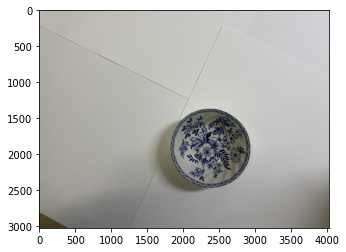

In [103]:
example_image = example_image.astype("float32")    
plot_mx_array(example_image)

In [104]:
import random

In [105]:
brightness = 0.8
contrast = 0.8
alphastd = 0.8

In [106]:
alpha = 1.0 + random.uniform(-brightness, brightness)
example_image *= alpha

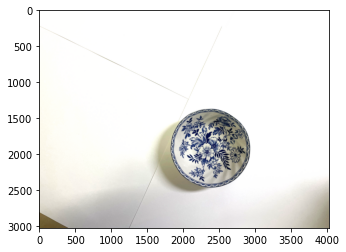

In [111]:
#밝기
example_image_copy = example_image.copy()
aug = mx.image.BrightnessJitterAug(brightness=1)
aug_image = aug(example_image_copy)
plot_mx_array(aug_image)

In [112]:
from mxnet import ndarray as nd

In [113]:
coef = nd.array([[[0.299, 0.587, 0.114]]])
alpha = 1.0 + random.uniform(-contrast, contrast)
gray = example_image * coef
gray = (3.0 * (1.0 - alpha) / gray.size) * nd.sum(gray)
example_image *= alpha
example_image += gray

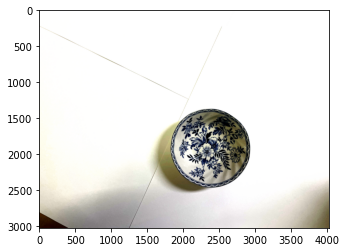

In [131]:
#대조
example_image_copy = example_image.copy()
aug = mx.image.ContrastJitterAug(contrast=1)
aug_image = aug(example_image_copy)
plot_mx_array(aug_image)

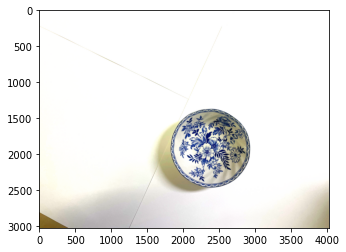

In [132]:
#Saturation
example_image_copy = example_image.copy()
aug = mx.image.SaturationJitterAug(saturation=1)
aug_image = aug(example_image_copy)
plot_mx_array(aug_image)

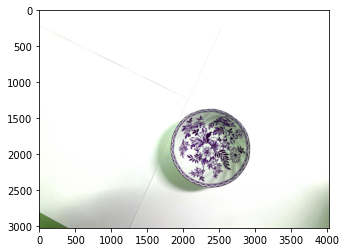

In [133]:
#색조
example_image_copy = example_image.copy()
aug = mx.image.HueJitterAug(hue=0.5) #(0~1)
aug_image = aug(example_image_copy)
plot_mx_array(aug_image)

In [120]:
alpha = np.random.normal(0, alphastd, size=(3,))

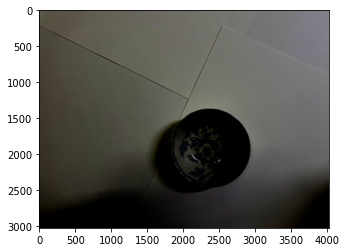

In [126]:
#lighting
example_image_copy = example_image.copy()
aug = mx.image.LightingAug(alphastd=100, eigval=np.asarray([1,1,1]), eigvec=np.ones((3,3)))
aug_image = aug(example_image_copy)
plot_mx_array(aug_image)

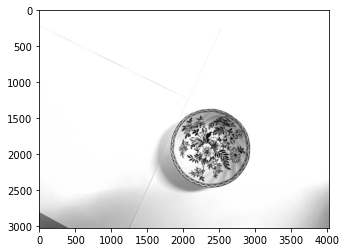

In [134]:
#그레이스케일
example_image_copy = example_image.copy()
aug = mx.image.RandomGrayAug(p=1) #(0~1)
aug_image = aug(example_image_copy)
plot_mx_array(aug_image)

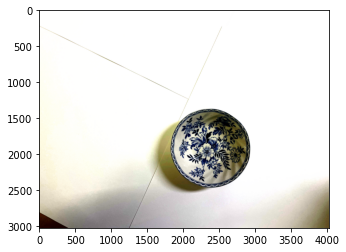

In [135]:
#밝기, 대조, 포화 랜덤 순서로 랜덤 적용
example_image_copy = example_image.copy()
aug = mx.image.ColorJitterAug(brightness=1, contrast=1, saturation=1)
aug_image = aug(example_image_copy)
plot_mx_array(aug_image)